In [1]:
import pandas as pd
import sqlite3
from utils import check_completeness,count_in_year,top_names_map

# Establishing connection and fetching data

In [2]:
connection = sqlite3.connect('usnames.sqlite')
nationalnames_df = pd.read_sql_query("SELECT * FROM NationalNames", connection)
statenames_df = pd.read_sql_query("SELECT * FROM StateNames", connection)

# Closing database connection

In [3]:
connection.close()

# Data analysis

## Data completeness check

In [4]:
check_completeness(nationalnames_df)
check_completeness(statenames_df)

DataFrame is complete!
DataFrame is complete!


##Resuable DataFrames

In [5]:
nat_sum_gender=nationalnames_df.groupby(['Name', 'Year'])['Count'].sum().reset_index()
state_sum_genders=statenames_df.groupby(['Name', 'Year','State'])['Count'].sum().reset_index()

## Querying the data
### How did the name Ida change period-over-period nationally?

<Axes: title={'center': 'How many children were named "Ida" in a given year in US'}, xlabel='Year'>

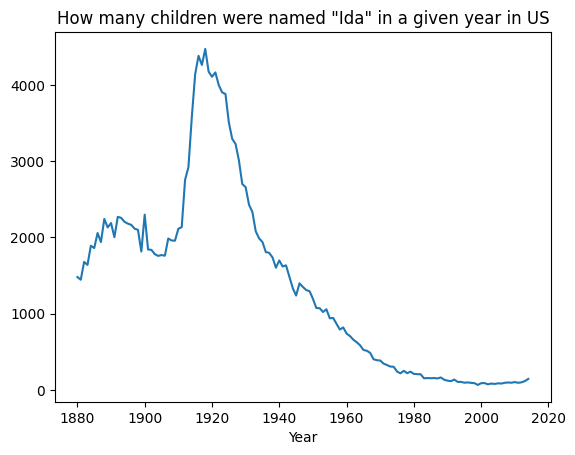

In [6]:
ida_national=nat_sum_gender[nat_sum_gender['Name']=='Ida'].groupby('Year')['Count'].sum()
ida_national.plot(x='Year', y='Count', kind='line',title='How many children were named "Ida" in a given year in US') 

### How did the name Ida change period-over-period in California?

<Axes: title={'center': 'How many children were named "Ida" in a given year in California'}, xlabel='Year'>

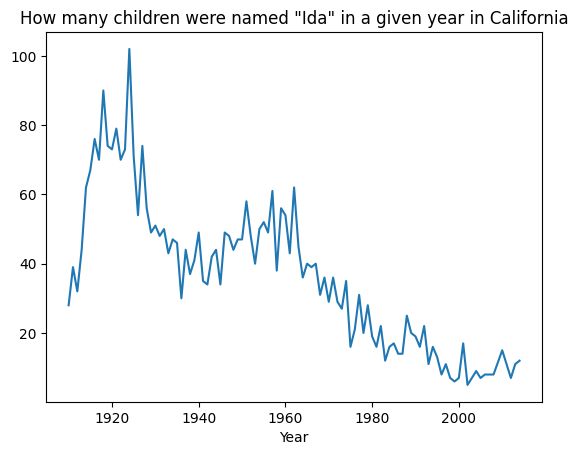

In [7]:
ida_california=state_sum_genders[(state_sum_genders['Name']=='Ida') & (state_sum_genders['State']=='CA')].groupby('Year')['Count'].sum()
ida_california.plot(x='Year', y='Count', kind='line',title='How many children were named "Ida" in a given year in California') 

### What is the most progressively growing in popularity name?

In [8]:
nationalnames_progress = pd.merge(count_in_year(nationalnames_df,2000,True),count_in_year(nationalnames_df,2014,True), how='outer', on=['Name']).fillna(0)
nationalnames_progress['Progress']=nationalnames_progress['Count_2014']-nationalnames_progress['Count_2000']
print(nationalnames_progress.sort_values(by="Progress",ascending=False).head())

         Name  Count_2000  Count_2014  Progress
14061    Emma        15.0     20799.0   20784.0
33983  Olivia         6.0     19674.0   19668.0
33534    Noah        64.0     19144.0   19080.0
39999  Sophia         6.0     18490.0   18484.0
27685    Liam        12.0     18342.0   18330.0


<Axes: title={'center': 'How many children were named "Emma" in a given year in US'}, xlabel='Year'>

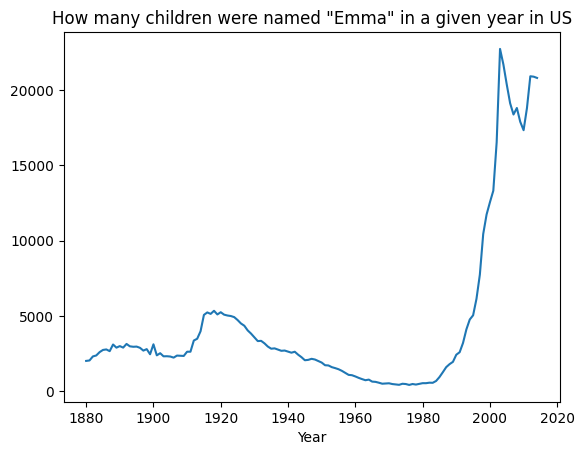

In [9]:
emma_national=nationalnames_df[nationalnames_df['Name']=='Emma'].groupby('Year')['Count'].sum()
emma_national.plot(x='Year', y='Count', kind='line',title='How many children were named "Emma" in a given year in US') 

### What is the first and the last name recorded in history taking into account alphabetical order?

In [10]:
names_sorted=nationalnames_df.groupby(['Name'])['Count'].sum().reset_index().sort_values(by='Name')
print(names_sorted.head())

        Name  Count
0      Aaban     72
1      Aabha     21
2      Aabid      5
3  Aabriella     10
4      Aadam    196


In [11]:
print(names_sorted.tail())

            Name  Count
93884  Zytavious     43
93885     Zyvion      5
93886    Zyyanna      6
93887      Zyyon      6
93888      Zzyzx      5


### What name is the most unisex?

In [12]:
names_by_gender=nationalnames_df.groupby(['Name', 'Gender'])['Count'].sum().unstack().dropna()
names_by_gender['gender_diff']=abs(names_by_gender['M']-names_by_gender['F'])
print(names_by_gender[names_by_gender['gender_diff']==names_by_gender['gender_diff'].min()].head())

Gender      F    M  gender_diff
Name                           
Abiyah    5.0  5.0          0.0
Adason    5.0  5.0          0.0
Adeyinka  5.0  5.0          0.0
Alexiel   5.0  5.0          0.0
Alique    5.0  5.0          0.0


With this indecisive answer, I decided to narrow down the data. 

### The most unisex name among those, which were given to children at least 100 times

In [13]:
names_by_gender_100=names_by_gender[(names_by_gender['M']+names_by_gender['F'])>100]
print(names_by_gender_100[names_by_gender_100['gender_diff']==names_by_gender_100['gender_diff'].min()])

Gender     F     M  gender_diff
Name                           
Tkai    72.0  72.0          0.0


### Which names are common nationally but rare at the state level?

#### Top names for a given year

In [14]:
top_counts=nat_sum_gender.groupby('Year')['Count'].idxmax()
top_names=nat_sum_gender.loc[top_counts]
print(top_names)

             Name  Year  Count
768543       John  1880   9701
768544       John  1881   8795
768545       John  1882   9597
768546       John  1883   8934
768547       John  1884   9428
...           ...   ...    ...
667232   Isabella  2010  22913
1450263    Sophia  2011  21839
1450264    Sophia  2012  22285
1450265    Sophia  2013  21172
498533       Emma  2014  20811

[135 rows x 3 columns]


#### Top names altogether

In [15]:
top_names_all=top_names.groupby('Name')['Year'].count().sort_values(ascending=False).reset_index().rename(columns={'Year':'Amount of years on top'})
print(top_names_all.to_string(index=False))
top_names_all.to_csv('top_names_all.csv', index=False, sep=';')

    Name  Amount of years on top
    Mary                      49
 Michael                      44
   James                      11
   Jacob                      10
  Robert                       6
    John                       5
   Linda                       3
  Sophia                       3
Isabella                       2
    Emma                       1
   David                       1


#### When Mary was the top name for the last time?

In [16]:
print(top_names[top_names['Name']=='Mary'].sort_values(by='Year',ascending=False)[:5])

         Name  Year  Count
1080593  Mary  1934  57221
1080592  Mary  1933  55809
1080591  Mary  1932  60201
1080589  Mary  1930  64474
1080588  Mary  1929  63835


#### What were the top names in the particular states in 1934?

In [17]:
state_names_1934=count_in_year(state_sum_genders,1934)
top_state_names_1934=state_names_1934.loc[state_names_1934.groupby('State')['Count'].idxmax()]
print(top_state_names_1934)

            Name  Count State
3723787     Mary     31    AK
3723788     Mary   2305    AL
2412732    James   1368    AR
3723790     Mary    287    AZ
4451182   Robert   2204    CA
4451183   Robert    559    CO
4451184   Robert    839    CT
3723794     Mary    288    DC
2683650     John    135    DE
2412739    James    874    FL
2412740    James   2286    GA
4421771  Richard    145    HI
3723799     Mary   1091    IA
4451191   Robert    191    ID
4451192   Robert   3586    IL
4451193   Robert   1627    IN
4451194   Robert    819    KS
2412747    James   2054    KY
3723805     Mary   1252    LA
4451197   Robert   2486    MA
3723807     Mary    892    MD
4451199   Robert    448    ME
4451200   Robert   2617    MI
4451201   Robert   1134    MN
3723811     Mary   1811    MO
2412755    James   1613    MS
3723813     Mary    232    MT
2412757    James   2950    NC
4451206   Robert    279    ND
4451207   Robert    675    NE
4451208   Robert    336    NH
4451209   Robert   1867    NJ
3723819   

#### What was the count of Mary's at that time?

In [18]:
print(state_names_1934[(state_names_1934['Name']=='Mary')].sort_values(by="State"))

         Name  Count State
3723787  Mary     31    AK
3723788  Mary   2305    AL
3723789  Mary   1223    AR
3723790  Mary    287    AZ
3723791  Mary   1596    CA
3723792  Mary    509    CO
3723793  Mary    459    CT
3723794  Mary    288    DC
3723795  Mary     93    DE
3723796  Mary    793    FL
3723797  Mary   2233    GA
3723798  Mary     71    HI
3723799  Mary   1091    IA
3723800  Mary    120    ID
3723801  Mary   2678    IL
3723802  Mary   1473    IN
3723803  Mary    814    KS
3723804  Mary   1890    KY
3723805  Mary   1252    LA
3723806  Mary   1521    MA
3723807  Mary    892    MD
3723808  Mary    219    ME
3723809  Mary   2045    MI
3723810  Mary    931    MN
3723811  Mary   1811    MO
3723812  Mary   1505    MS
3723813  Mary    232    MT
3723814  Mary   2459    NC
3723815  Mary    202    ND
3723816  Mary    561    NE
3723817  Mary    100    NH
3723818  Mary   1062    NJ
3723819  Mary    433    NM
3723820  Mary     23    NV
3723821  Mary   3717    NY
3723822  Mary   2914    OH
3

Using the default year of 2021


<Axes: >

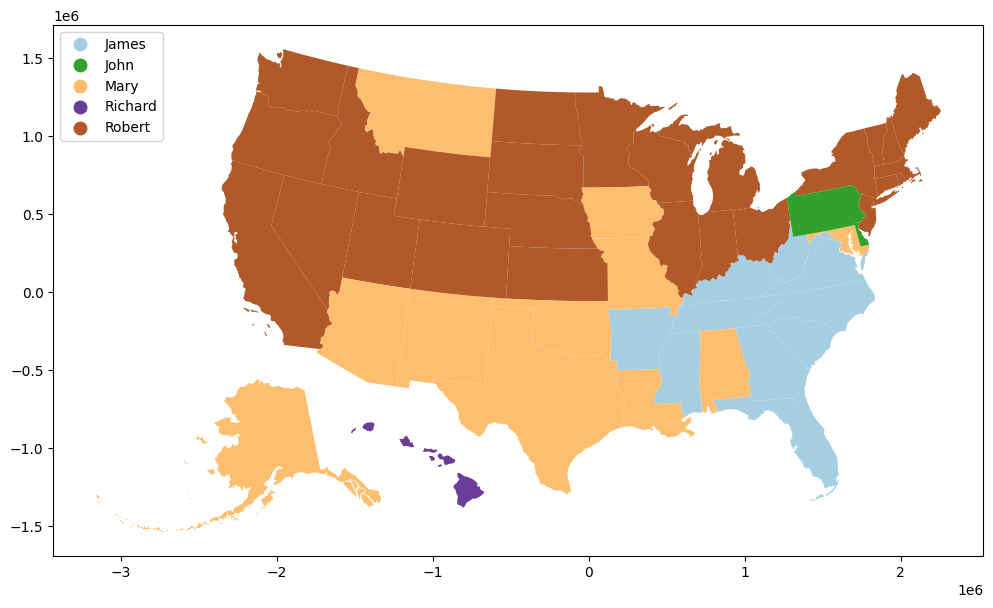

In [19]:
top_names_map(top_state_names_1934).plot(column='PopName',legend=True,figsize=(12,12),legend_kwds={'loc':'upper left'},cmap='Paired')

## How does this distribution look recently?

In [20]:
state_names_2014=count_in_year(state_sum_genders,2014)
top_state_names_2014=state_names_2014.loc[state_names_2014.groupby('State')['Count'].idxmax()]
print(top_state_names_2014)

              Name  Count State
3331576       Liam     65    AK
5361407    William    427    AL
1725217       Emma    220    AR
4848614     Sophia    482    AZ
4848615     Sophia   3162    CA
4129348     Olivia    341    CO
4129349     Olivia    256    CT
128943   Alexander     75    DC
4848619     Sophia     70    DE
2316671   Isabella   1459    FL
5361416    William    719    GA
4079176       Noah     99    HI
3331588       Liam    217    IA
1725228       Emma    117    ID
4129357     Olivia    901    IL
3331591       Liam    477    IN
4129359     Olivia    212    KS
5361423    William    360    KY
3737788      Mason    296    LA
530427    Benjamin    453    MA
3387858      Logan    367    MD
3331597       Liam    103    ME
4129365     Olivia    637    MI
4129366     Olivia    362    MN
1725239       Emma    433    MO
5361431    William    226    MS
5361432    William     60    MT
5361433    William    728    NC
2156569     Harper     69    ND
3331605       Liam    149    NE
2367198 

Using the default year of 2021


<Axes: >

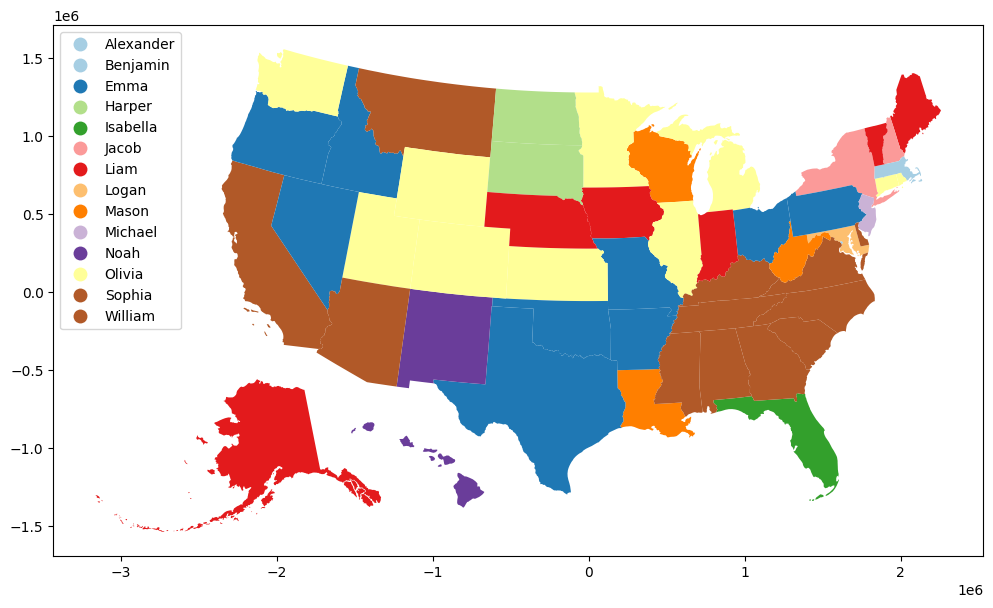

In [21]:
top_names_map(top_state_names_2014).plot(column='PopName',legend=True,figsize=(12,12),legend_kwds={'loc':'upper left'},cmap='Paired')